# Modeling the Gravitational Slingshot Effect
### Sam Cochran, Jacob Murri Caleb Wilson

In [14]:
# Import packages
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style, rcParams
import matplotlib.animation as animation
#might want 3D stuff later
#from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
style.use('seaborn')
rcParams['figure.figsize'] = 10, 10


In our project we are attempting to model the physics of the slingshot effect, whereby a satellite can swing around a planet and receive a boost in speed so that it can successfully reach its destination. To begin to model this, we have to consider Newton's laws applied to the three bodies in question: the sun, the planet, and the satellite. Let $\mathbf{x}_1(t), \mathbf{x}_2(t), \mathbf{x}_3(t) \in \mathbb{R}^3$ be the positions of these three bodies, which have masses $m_1, m_2, m_3 \geq 0$. Then if $G$ is the universal gravitational constant, the equations of motion given by Newton's Second Law are
$$ 
\mathbf{x}_1''(t) = \frac{G m_2 (\mathbf{x}_2(t) - \mathbf{x}_1(t))}{\|\mathbf{x}_2(t) - \mathbf{x}_1(t)\|^3}
+ \frac{G m_3 (\mathbf{x}_3(t) - \mathbf{x}_1(t))}{\|\mathbf{x}_3(t) - \mathbf{x}_1(t)\|^3}
$$
$$ 
\mathbf{x}_2''(t) = \frac{G m_1 (\mathbf{x}_1(t) - \mathbf{x}_2(t))}{\|\mathbf{x}_1(t) - \mathbf{x}_2(t)\|^3}
+ \frac{G m_3 (\mathbf{x}_3(t) - \mathbf{x}_2(t))}{\|\mathbf{x}_3(t) - \mathbf{x}_2(t)\|^3}
$$
$$ 
\mathbf{x}_3''(t) = \frac{G m_2 (\mathbf{x}_2(t) - \mathbf{x}_3(t))}{\|\mathbf{x}_2(t) - \mathbf{x}_3(t)\|^3}
+ \frac{G m_1 (\mathbf{x}_1(t) - \mathbf{x}_3(t))}{\|\mathbf{x}_1(t) - \mathbf{x}_3(t)\|^3}
$$

In the situation that we are considering, the mass $m_3$ of the satellite is much smaller than the other masses. To account for this and simplify the model accordingly, we take the limit $m_3 \to 0$. In this limit the first two equations become their own system:
$$ 
\mathbf{x}_1''(t) = \frac{G m_2 (\mathbf{x}_2(t) - \mathbf{x}_1(t))}{\|\mathbf{x}_2(t) - \mathbf{x}_1(t)\|^3}
; \qquad  
\mathbf{x}_2''(t) = \frac{G m_1 (\mathbf{x}_1(t) - \mathbf{x}_2(t))}{\|\mathbf{x}_1(t) - \mathbf{x}_2(t)\|^3}
$$


and the third mass evolves in time depending on the solution for the first two masses:

$$ 
\mathbf{x}_3''(t) = \frac{G m_2 (\mathbf{x}_2(t) - \mathbf{x}_3(t))}{\|\mathbf{x}_2(t) - \mathbf{x}_3(t)\|^3}
+ \frac{G m_1 (\mathbf{x}_1(t) - \mathbf{x}_3(t))}{\|\mathbf{x}_1(t) - \mathbf{x}_3(t)\|^3}
$$

Now we can introduce dimensionless time, space, and mass parameters to make our system more tractable. Let $L$, $\Theta$, and $M$ be characteristic length, time, and mass scales, with units of meters, seconds, and kilograms, respectively. Then introduce the dimensionless parameters $\mathbf{u}_i = \mathbf{x}_i/L$, $\tau = t/\Theta$, and $\mu_i = m_i/M$. Then we can rewrite the equations as 

$$ 
\frac{L}{\Theta^2}\mathbf{u}_1''(\tau) = \frac{G  M \mu_2 L (\mathbf{u}_2(\tau) - \mathbf{u}_1(\tau))}{L^3\|\mathbf{u}_2(\tau) - \mathbf{u}_1(\tau)\|^3}
; \qquad  
\frac{L}{\Theta^2} \mathbf{u}_2''(\tau) = \frac{G M \mu_1 L (\mathbf{u}_1(\tau) - \mathbf{u}_2(\tau))}{L^3\|\mathbf{u}_1(\tau) - \mathbf{u}_2(\tau)\|^3}
; \qquad
\frac{L}{\Theta^2}\mathbf{u}_3''(\tau) = \frac{G M \mu_2 L (\mathbf{u}_2(\tau) - \mathbf{u}_3(\tau))}{L^3\|\mathbf{u}_2(\tau) - \mathbf{u}_3(\tau)\|^3}
+ \frac{G M \mu_1 L (\mathbf{u}_1(\tau) - \mathbf{u}_3(\tau))}{L^3\|\mathbf{u}_1(\tau) - \mathbf{u}_3(\tau)\|^3}
$$

which we can simplify to

$$ 
\mathbf{u}_1''(\tau) = \frac{GM \Theta^2}{L^3} \frac{ \mu_2 (\mathbf{u}_2(\tau) - \mathbf{u}_1(\tau))}{\|\mathbf{u}_2(\tau) - \mathbf{u}_1(\tau)\|^3}
; \qquad  
\mathbf{u}_2''(\tau) = \frac{GM \Theta^2}{L^3} \frac{\mu_1 (\mathbf{u}_1(\tau) - \mathbf{u}_2(\tau))}{\|\mathbf{u}_1(\tau) - \mathbf{u}_2(\tau)\|^3}
; \qquad
\mathbf{u}_3''(\tau) = \frac{GM \Theta^2}{L^3} \left[ \frac{ \mu_2 (\mathbf{u}_2(\tau) - \mathbf{u}_3(\tau))}{\|\mathbf{u}_2(\tau) - \mathbf{u}_3(\tau)\|^3}
+ \frac{\mu_1(\mathbf{u}_1(\tau) - \mathbf{u}_3(\tau))}{\|\mathbf{u}_1(\tau) - \mathbf{u}_3(\tau)\|^3}\right].
$$

Then by choosing our mass, length, and time scales accordingly, we can set $GM\Theta^2/L^3 = 1$, so that our equations have the dimensionless form

$$ 
\mathbf{u}_1''(\tau) = \frac{ \mu_2 (\mathbf{u}_2(\tau) - \mathbf{u}_1(\tau))}{\|\mathbf{u}_2(\tau) - \mathbf{u}_1(\tau)\|^3}
; \qquad  
\mathbf{u}_2''(\tau) = \frac{\mu_1 (\mathbf{u}_1(\tau) - \mathbf{u}_2(\tau))}{\|\mathbf{u}_1(\tau) - \mathbf{u}_2(\tau)\|^3}
; \qquad
\mathbf{u}_3''(\tau) = \frac{ \mu_2 (\mathbf{u}_2(\tau) - \mathbf{u}_3(\tau))}{\|\mathbf{u}_2(\tau) - \mathbf{u}_3(\tau)\|^3}
+ \frac{\mu_1(\mathbf{u}_1(\tau) - \mathbf{u}_3(\tau))}{\|\mathbf{u}_1(\tau) - \mathbf{u}_3(\tau)\|^3}.
$$

To make the equations easier to integrate numerically, we can make our system first order by setting $\mathbf{v}_i(\tau) = \mathbf{u}_i'(\tau)$. Then we have the equations

$$ 
\mathbf{u}_1'(\tau) = \mathbf{v}_1(\tau)
; \qquad 
\mathbf{u}_2'(\tau) = \mathbf{v}_2(\tau)
; \qquad 
\mathbf{u}_3'(\tau) = \mathbf{v}_3(\tau)
;
$$

$$
\mathbf{v}_1'(\tau) = \frac{ \mu_2 (\mathbf{u}_2(\tau) - \mathbf{u}_1(\tau))}{\|\mathbf{u}_2(\tau) - \mathbf{u}_1(\tau)\|^3}
; \qquad  
\mathbf{v}_2'(\tau) = \frac{\mu_1 (\mathbf{u}_1(\tau) - \mathbf{u}_2(\tau))}{\|\mathbf{u}_1(\tau) - \mathbf{u}_2(\tau)\|^3}
; \qquad
\mathbf{v}_3'(\tau) = \frac{ \mu_2 (\mathbf{u}_2(\tau) - \mathbf{u}_3(\tau))}{\|\mathbf{u}_2(\tau) - \mathbf{u}_3(\tau)\|^3}
+ \frac{\mu_1(\mathbf{u}_1(\tau) - \mathbf{u}_3(\tau))}{\|\mathbf{u}_1(\tau) - \mathbf{u}_3(\tau)\|^3}.
$$

Now we can write a function that computes these derivatives:

In [32]:
def gravity_acceleration(t, x, m1=1, m2=1):
    """
    
    Parameters:
        x (ndarray, length 18) xyz coordinates of 3 bodies, followed by their velocities
    """
    # Extract coordinates
    v = x[9:]
    x1, x2, x3 = x[:3], x[3:6], x[6:9]
    
    # Get body distances
    sqdist12 = np.sum(np.square(x2-x1))
    sqdist13 = np.sum(np.square(x3-x1))
    sqdist23 = np.sum(np.square(x3-x2))
    
    # Construct the acceleration due to gravity
    a = np.zeros(9)
    
    a[:3] = m2*(x2-x1)/np.power(sqdist12, 1.5)
    a[3:6] = m1*(x1-x2)/np.power(sqdist12, 1.5)
    a[6:9] = m2*(x2-x3)/np.power(sqdist23, 1.5) + m1*(x1-x3)/np.power(sqdist13, 1.5)
    
    # Return the result
    return np.concatenate((v,a))

def quiver_acceleration(u12, u3, m1=1, m2=2):
    """This is similar to the method above except it specializes in calculating an acceleration vector field for the 3rd mass
    in the system where the positions of the 1st and 2nd mass have been precalculated and we investigate the acceleration 
    experienced by potential 3rd masses at all positions in a grid. We also assume that z=0 for everything in the system.
    
    Parameters:
        u12 (ndarray, (6,T)) xyz coordinates of the first 2 bodies (we ignore the z coordinates)
        u3 (ndarray, (2, N, N)) xy coordinate grid array of the 3rd body
        m1 (float) the mass of the first body
        m2 (float) the mass of the second body
    Returns:
        a_x (ndarray (2,T,N,N)) the acceleration (x,y) for each 3rd body point in the grid over all time
    """
    u1 = u12[:2,:].reshape(2, -1, 1, 1) # (2,T,1,1)
    u2 = u12[4:6, :].reshape(2, -1, 1, 1) # (2,T,1,1)
    d, N, _N = u3.shape #using d to make it easier to generalize to include z-coord
    u3 = u3.reshape(d, 1, N, N) #(2, 1, N, N)
    sqdist13 = np.sum(np.square(u3-u1)) # (2,1,N,N) - (2,T,1,1) = (2,T,N,N) using array broadcasting
    sqdist23 = np.sum(np.square(u3-u2)) # (2,1,N,N) - (2,T,1,1) = (2,T,N,N)
    a = m2*(u2-u3)/np.power(sqdist23, 1.5) + m1*(u1-u3)/np.power(sqdist13, 1.5) #(2,T,N,N)
    return a

We can test our function using some example initial conditions:

In [3]:
# Set an orbit distance and initial velocity to create a circular orbit for the first two masses
r = 1
v = 1/(2*np.sqrt(r))
x1, v1 = np.array([+r, 0, 0]), np.array([0, +v, 0])
x2, v2 = np.array([-r, 0, 0]), np.array([0, v, 0])

# Select initial conditions for the third mass
x3, v3 = np.array([2, 0, 0]), np.array([0, 1, 0])

# Helper function
def create_ic_array(x1, x2, x3, v1, v2, v3): return np.concatenate((x1, x2, x3, v1, v2, v3))

# Get our initial conditions
ic1 = create_ic_array(x1, x2, x3, v1, v2, v3)

In [4]:
def simulate_mechanics(ic, t_span, t_eval, mass_ratio=1):
    """
    Uses solve_ivp to simulate the time evolution of the system with given 
    initial conditions under gravity.
    
    Parameters:
        ic (ndarray, (18,)): initial conditions 
        t_span (tuple, 2): start and end of time interval 
        t_eval (ndarray): evaluation times for solution
        mass_ratio (float): ratio m2/m1 (m1=1 by default, then m2 = mass_ratio)
        
    Returns:
        sol (ndarray, (18, L)): an array where each column is the state of the 
            system at the given time step
    """
    # Construct a function for use in solve_ivp
    f = lambda t, y: gravity_acceleration(t, y, m1=1, m2=mass_ratio)
    
    # Numerically simulate
    sol = solve_ivp(fun=f, t_span=t_span, y0=ic, t_eval=t_eval)
    
    # Return the solution
    return sol.y
    

Let's test the function on some given initial conditions:

In [5]:
sol = simulate_mechanics(ic1, (0, 5), np.linspace(0, 5, 250))

We can see that the first and second masses stay close to a circle of radius 1:

In [6]:
x1, y1 = sol[0, :], sol[1, :]
x2, y2 = sol[3, :], sol[4, :]

print(x1**2+y1**2)
print(x2**2+y2**2)

[1.         1.         1.00000001 1.00000007 1.00000022 1.00000053
 1.0000011  1.00000204 1.00000347 1.0000054  1.00000789 1.00001126
 1.00001583 1.00002191 1.00002983 1.00003991 1.0000525  1.00006795
 1.00008662 1.00010886 1.00013508 1.00016566 1.00020101 1.00024157
 1.00028779 1.00034012 1.00039907 1.00046515 1.00053889 1.00062088
 1.00071171 1.00081203 1.00092249 1.00104381 1.00117675 1.0013221
 1.0014807  1.00165344 1.00184128 1.00204522 1.00226632 1.00250571
 1.00276458 1.00304421 1.00334594 1.00367105 1.00402001 1.00439401
 1.00479447 1.0052228  1.00568043 1.00616881 1.00668942 1.00724378
 1.00783346 1.0084601  1.00912541 1.00983118 1.01057929 1.01137174
 1.01221065 1.01309827 1.01403676 1.01502836 1.01607546 1.01718053
 1.01834619 1.01957514 1.02087023 1.0222344  1.02367074 1.02518248
 1.02677301 1.02844586 1.03020477 1.03205362 1.03399653 1.0360378
 1.03818199 1.04043388 1.04279849 1.04528124 1.04788787 1.05062437
 1.05349705 1.05651272 1.05967753 1.06299859 1.06648704 1.070153

Now we create some figures to model the dynamics of our system (restricted to the planar problem, for now).  We will use a toy problem to do this initial visualization, i.e. assume both primary masses are of mass 1.

Important: the plotting scheme below assumes the z coordinates of the initial condition are zero (these are indices 2, 5, 8, 11, 14, 17).

In each of these cases, there is something wrong with the outcome.  The plots below, more than anything, illustrate the difficulty of choosing initial conditions that allow for a successful slingshot maneuver.  Our task moving forward is to find a way to choose good initial conditions that allow for successful slingshot maneuvers.

I've gone ahead and hidden the inputs for all but the first plot, as they are essentially identical.

In [49]:
#Plotting code
def plot_solution(sol, title):
    # Plot the solutions, assuming we have
    fig, ax = plt.subplots()

    # First body
    first = ax.plot(sol[0, :], sol[1, :], color='steelblue', label='First Body')
    ax.plot(sol[0, -1], sol[1, -1], color='steelblue', marker='o')

    # Second body
    second = ax.plot(sol[3, :], sol[4, :], color='seagreen', label='Second Body')
    ax.plot(sol[3, -1], sol[4, -1], color='seagreen', marker='o')

    # Third body
    third = ax.plot(sol[6, :], sol[7, :], color='indigo', label='Third Body')
    ax.plot(sol[6, -1], sol[7, -1], color='indigo', marker='o')
    
    #quivers
    u3x, u3y, a_x, a_y = get_acc_quivers(sol)
    ax.quiver(u3x, u3y, a_x[-1], a_y[-1], label='Acceleration field')

    # Set plot parameters and labels
    ax.set_title(title, fontsize=16)
    ax.set_aspect('equal')
    ax.legend(fontsize=12)
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    plt.show()

def get_acc_quivers(sol, grid_size=25):
    """Get acceleration vector field on the 3rd body given the current solution (only using the posiitions of the 1st and 
    2nd body) over time. For the specs below, N is the grid_size parameter and T is the number of time values in sol
    
    Inputs:
        sol (ndarray (18, T)) only uses the first 6 parts of sol: xyz coords for the 1st and 2nd bodies over time
        grid_size (int): how many evenly dispersed points on the grid to evaluate over time
    Returns:
        u3x (ndarray (N, N)): the x meshgrid for plotting the quivers
        u3y (ndarray (N, N)): the y meshgrid for plotting the quivers
        a_x (ndarray (T, N, N)): the x acceleration at each point of the grid for all time
        a_y (ndarray (T, N, N)): the y acceleration at each point of the grid for all time
    """
    u3x, u3y = np.meshgrid(np.linspace(-4,4,grid_size), np.linspace(-4,4,grid_size)) #(N,N)
    u3 = np.stack((u3x, u3y), axis=0) #(2,N,N)
    a_x, a_y = quiver_acceleration(sol[:7], u3) #sol[:7] == u12
    return u3x, u3y, a_x, a_y
    
def animate_solution(sol, title, filename, skip=1, interval=30, show_quivers=True):
    fig, ax = plt.subplots()
    
    u3x, u3y, a_x, a_y = get_acc_quivers(sol)
    
    first, = ax.plot([], [], color='steelblue', ls='--', label='First Body')
    first_pt, = ax.plot(sol[0, 0], sol[1, 0], color='steelblue', marker='o')

    # Second body
    second, = ax.plot([], [], color='seagreen', ls='--', label='Second Body')
    second_pt, = ax.plot(sol[3, 0], sol[4, 0], color='seagreen', marker='o')

    # Third body
    third, = ax.plot([], [], color='indigo', ls='--', label='Third Body')
    third_pt, = ax.plot(sol[6, 0], sol[7, 0], color='indigo', marker='o')
    
    #vector field
    if show_quivers:
        quiver = ax.quiver(u3x, u3y, a_x[0,:,:], a_y[0,:,:], alpha=0.5, label='Acceleration field')
        
    # Set plot parameters and labels
    ax.set_title(title, fontsize=16)
    ax.set_aspect('equal')
    ax.legend(fontsize=12, bbox_to_anchor=(1, 0.5))
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    
    #limit animation frames
    N = sol.shape[1]
    frames = N // skip
    offset = N % skip
    
    def update(i):
        j = i*skip+offset
        first.set_data(sol[0, :j+1], sol[1, :j+1])
        second.set_data(sol[3, :j+1], sol[4, :j+1])
        third.set_data(sol[6, :j+1], sol[7, :j+1])
        
        first_pt.set_data(sol[0, j], sol[1, j])
        second_pt.set_data(sol[3, j], sol[4, j])
        third_pt.set_data(sol[6, j], sol[7, j])
        
        if show_quivers:
            quiver.set_UVC(a_x[j], a_y[j])
            return first, first_pt, second, second_pt, third, third_pt, quiver
        else:
            return first, first_pt, second, second_pt, third, third_pt
    
    ani = animation.FuncAnimation(fig, update, frames=range(frames), interval=interval)
    ani.save("../Animations/{}.mp4".format(filename))
    plt.show()

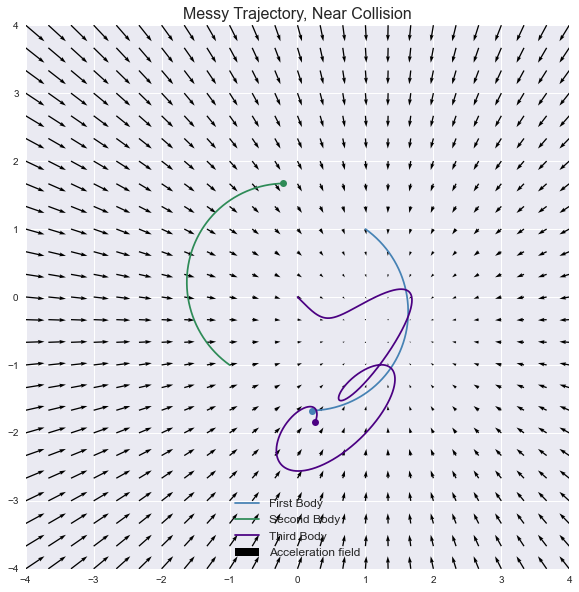

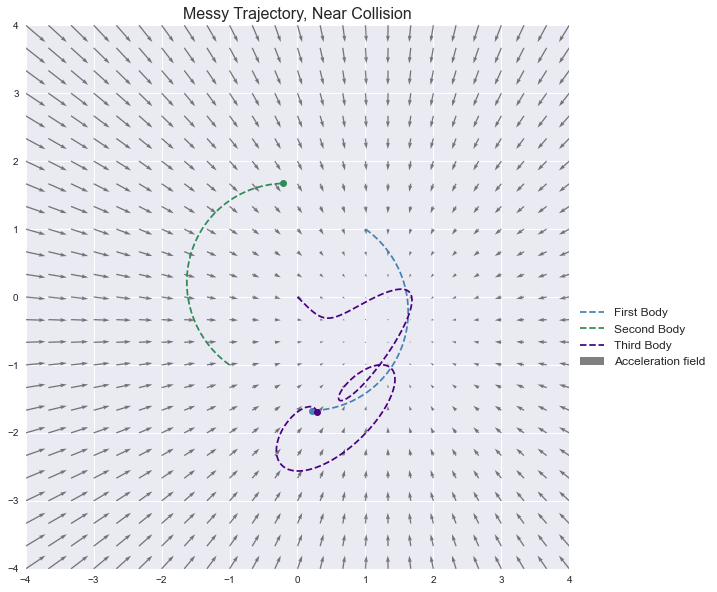

In [50]:
# Set up initial conditions and parameters
t0 = 0
tf = 10
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 .3, -.3, 0]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

plot_solution(sol, 'Messy Trajectory, Near Collision')
animate_solution(sol, 'Messy Trajectory, Near Collision', 'messy', skip=40)


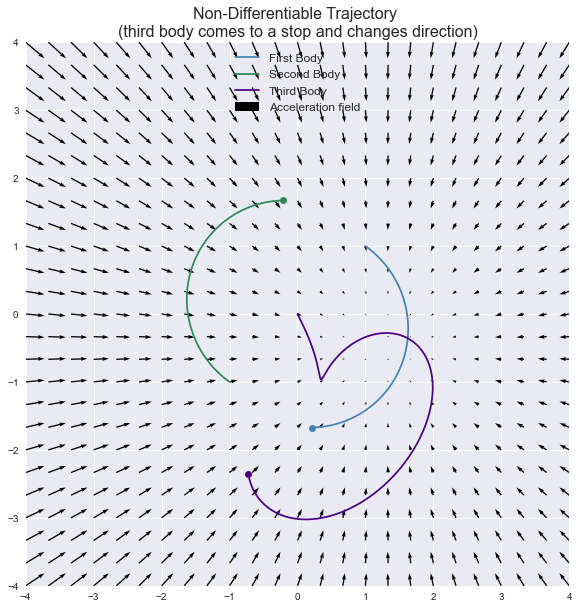

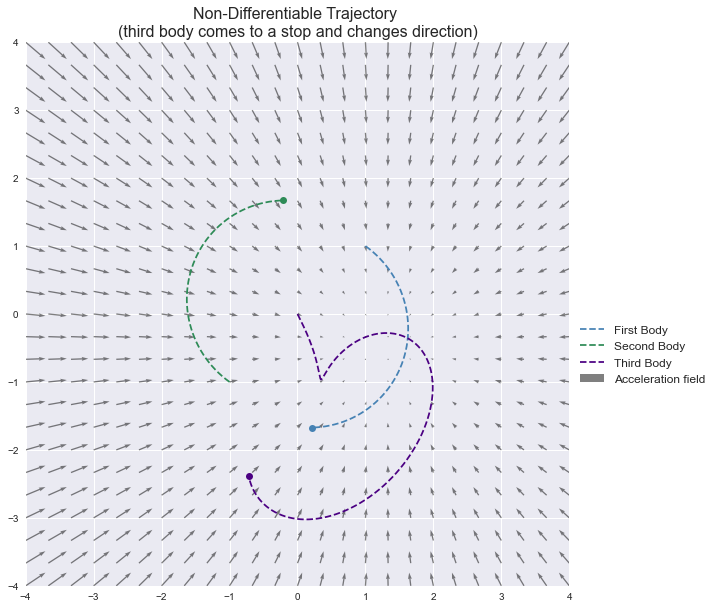

In [51]:
# Set up initial conditions and parameters
t0 = 0
tf = 10
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 .3, -.6, 0]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

title = 'Non-Differentiable Trajectory \n(third body comes to a stop and changes direction)'
plot_solution(sol, title)

animate_solution(sol, title, 'jagged', skip=40)

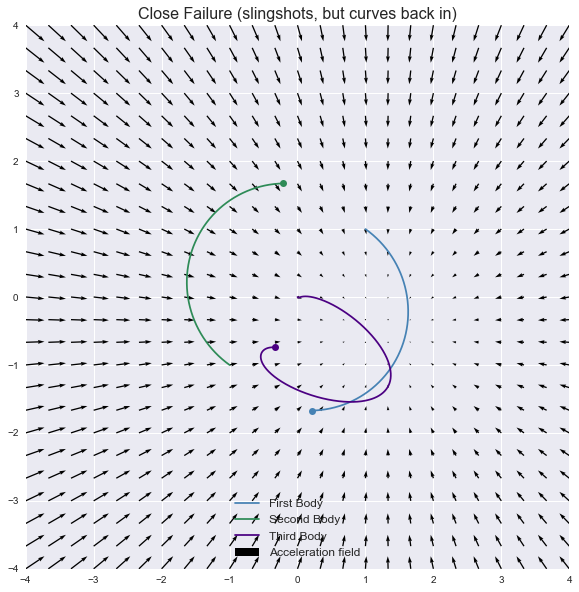

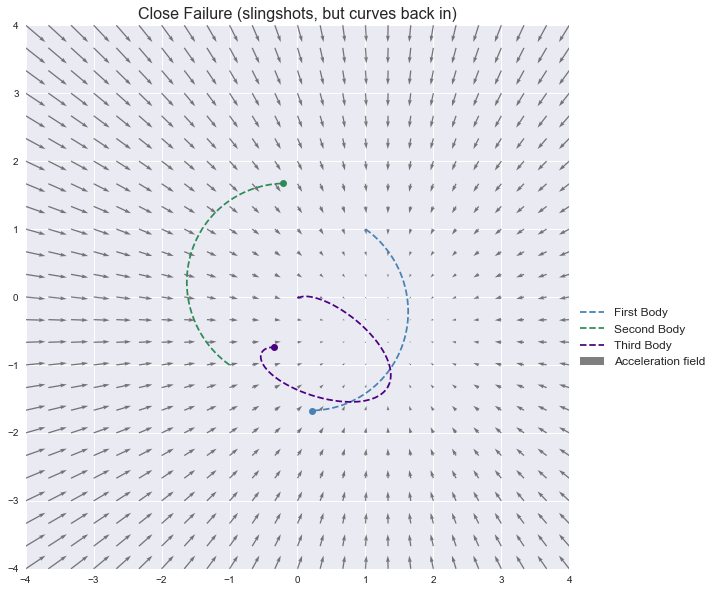

In [54]:
# Set up initial conditions and parameters
t0 = 0
tf = 10
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 .01, -.01, 0]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

title = 'Close Failure (slingshots, but curves back in)'
plot_solution(sol, title)
animate_solution(sol, title, 'close', skip=40)

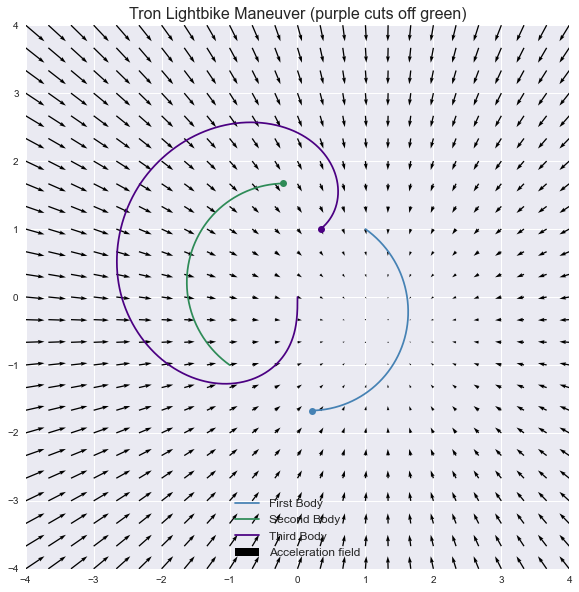

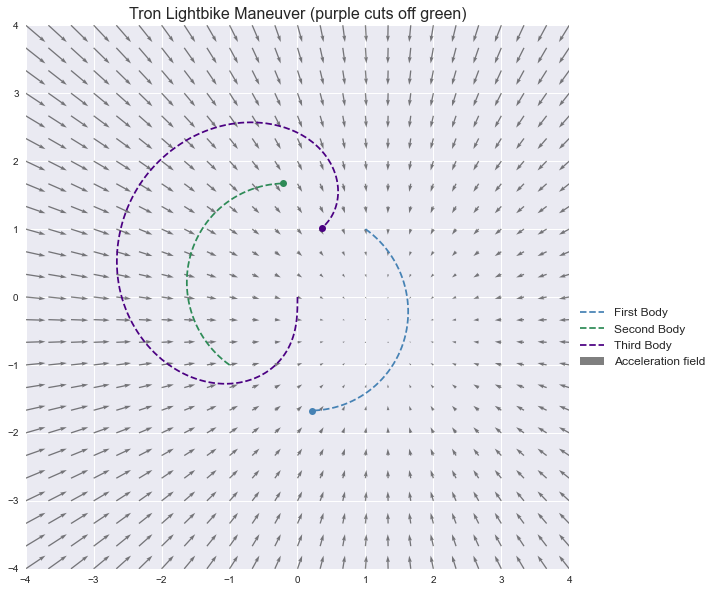

In [52]:
# Set up initial conditions and parameters
t0 = 0
tf = 10
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 0, -.7, 0]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

title = 'Tron Lightbike Maneuver (purple cuts off green)'
plot_solution(sol, title)
animate_solution(sol, title, 'tron', skip=40)

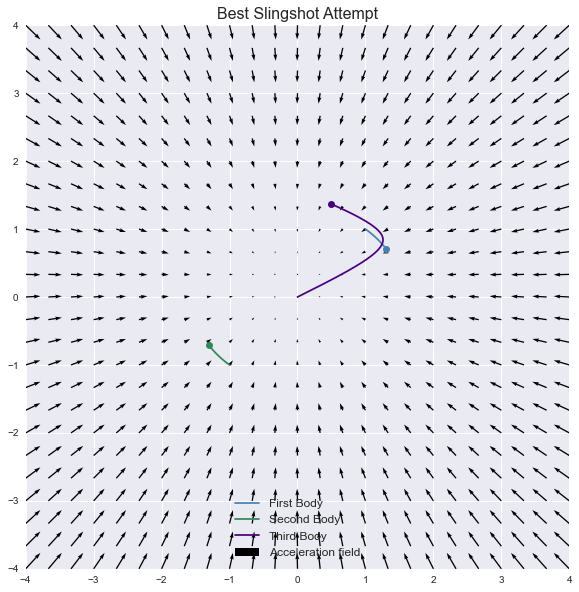

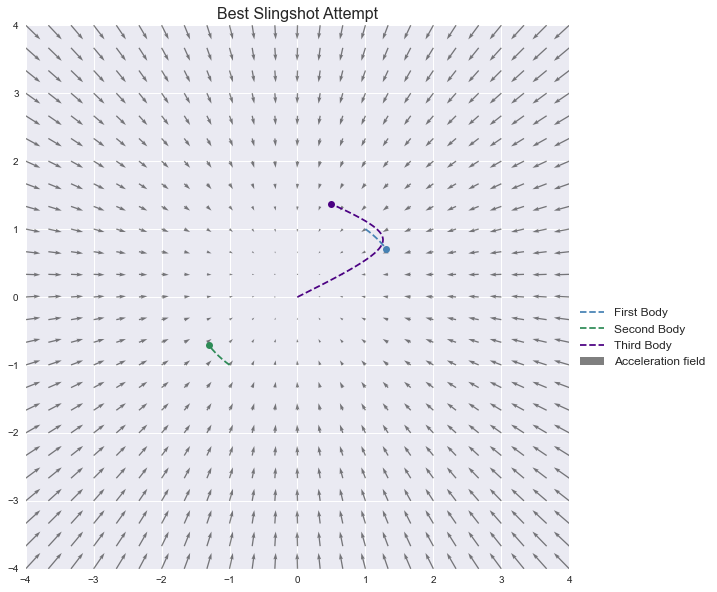

In [53]:
# Set up initial conditions and parameters
t0 = 0
tf = 1
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 2, 1, 0]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

plot_solution(sol, 'Best Slingshot Attempt')
animate_solution(sol, 'Best Slingshot Attempt', 'best_attempt', skip=40)

This is the closest we could get to a successful slingshot maneuver on this first attempt.  We came by this mostly by trial and error.  Though we have a long way to go, we note that the third body does indeed gain velocity and change direction by passing very close to the first body, so this is a solid initial model and illustrates our goal.

We further note that this is a very simple toy problem, with the first two primary bodies having mass of unity and the third body being considered as massless, so the masses, velocities, and positions for this model are pretty much meaningless, and only give us information relative to this model.